# Decision Tree Algoritması

- Hem sınıflandırma (classification) hem de regresyon (regression) problemlerinde kullanılan, ağaç yapısına benzer bir modeldir. İşleyişi oldukça sezgiseldir: Veriyi, özellikler (öz nitelikler) üzerinden “bölerek” (split) alt gruplara ayırır ve her yaprak (leaf) düğümünde tahmin (sınıf etiketi veya sürekli değer) yapar.

### Düğüm Türleri

1. Kök Düğüm (Root Node): Ağacın en üstündeki başlangıç düğümü.

2. İç Düğümler (Internal Nodes): Bir özelliğe göre veri kümesini bölen düğümler.

3. Yaprak Düğümler (Leaf Nodes): Daha fazla bölünmeyen ve tahmin sonucunu içeren düğümler.

4. Dal (Branch): Bir iç düğümden çıkan kenar; veri kümesinin bir alt kümesine işaret eder.

Evet buraya kadar teorik üzerinden ilerledik ve kavramlara az çok hakim olduk :) Şimdi ise basit bir örnek üzerinden ilerleyelim;

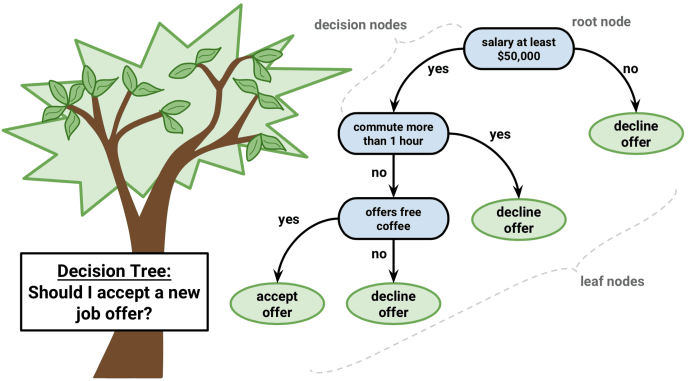

**Yukarıdaki fotoğrafı yorumlayalım ve zihnimizde algoritmayı canlandıralım..**

- Öncelikle kök düğümü görebiliyoruz, en üstte yer alan ve *Salary at least $50,000* yazan düğüm bizim kök düğümümüz. Yani başlangıç düğümü. Bu düğüm *yes* ve *no* ile birlikte ikiye ayrılıyor.

- Kök düğümün *yes* dalından devam edelim :) Yani eğer 50,000 dolardan fazla bir maaş girdisi var ise, *commute more than 1 hour* düğümüne ulaşırız. (Yani 1 saatten fazla yolculuk) --. Şimdi burada duralım, peki ya 50,000 dolardan daha az bir maaş veriliyorsa;

- 50,000 dolardan daha az maaş girdisi direkt teklifi reddet düğümüne ulaştırıyor bizi. Yani modele 45,000 dolar girdisi verirsek *OFFER DECLINED* çıktısı vericektir :)

- En son nerede kalmıştık, 1 saatten fazla yolculuk düğümündeydik. Peki yolculuk 1 saatten fazla ise ne oluyor. Görselde de göreceğiniz üzere teklif yeniden reddedildi. Yani maaş girdisi 60,000 dolar iken yolculuk süresi 2 saat ise *OFFER DECLINED* çıktısı ile karşılaşıyoruz.

- Tamam tamam, yolculuk 30 dakika sürüyor diyelim. Peki bu durumda hangi düğüme ulaştık...

- Tabiki *ÜCRETSİZ KAHVE HİZMETİ*, vazgeçilmezimiz. Eğer bu düğüm NO ile karşılaşıyorsa ee tabiki *OFFER DECLINED* diyoruz.

- Amaa *ÜCRETSİZ KAHVE HİZMETİ* yes ise, teklifi kabul ediyoruz ve işimiz hayırlı olsun :)

**Kısacası, maaşımız 60,000 dolar, yolculuk süresi 30 dakika ve ücretsiz kahve hizmeti karşısında yapay zeka teklifi kabul et çıktısı üretir. Buradan da anlayacağımız üzere, bir ağaç ve bu ağacın dalları belli koşullar durumunda bize cevap üretiyor ya da bize cevabı bulma yolunu oluşturuyor. Bu görsel ile açıklayıcı bir şekilde anlatabildiğimi düşünüyorum, biraz da pratik yapalım değil mi?**

#### Burada sınıflandırma kullanıyorum. Derste regressor kullanmıştık, classifier üzerine çalışma gerçekleştirdim.

In [31]:
import pandas as pd

In [32]:
# Öncelikle veri setimizi dataframe olarak okuyalım
df = pd.read_csv("dataset.csv")

In [33]:
# Ardından ilk 5 veriyi inceleyerek veri setinin yapısını görelim
# Bu arada bir açıklama yapalım:
# Bu veri seti, sosyal medya kullanım kalıpları ve ilişkiler ve ruh sağlığı üzerindeki algılanan etkileri hakkında anket yanıtlarını 
# içerir. Veriler öncelikle 18-25 yaş grubundaki bireylerden toplandı.

In [34]:
df.head()

,What is your age group?,What is your occupation?,Where do you live?,How many hours per day do you spend on social media?,How has social media affected your real-life relationships?,How frequently do you use email for communication?,Do you use LinkedIn for professional networking?,How often do you use WhatsApp for communication?,Which social media platforms do you use the most?,Do you feel that social media affects your mental health?
0,18-25,Student,Urban Area,More than 5 hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively"
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure
3,18-25,Student,Urban Area,3-5 hours,Worsened,Never,"No, never",Daily,Facebook,"Yes, negatively"
4,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"Yes, actively",Daily,Facebook,"Yes, negatively"


In [35]:
# info metodu ile veri setinin genel yapısını inceleyelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   What is your age group?                                       49 non-null     object
 1     What is your occupation?                                    49 non-null     object
 2   Where do you live?                                            49 non-null     object
 3   How many hours per day do you spend on social media?          49 non-null     object
 4   How has social media affected your real-life relationships?   49 non-null     object
 5   How frequently do you use email for communication?            49 non-null     object
 6   Do you use LinkedIn for professional networking?              49 non-null     object
 7   How often do you use WhatsApp for communication?              49 non-null     obje

In [36]:
# peki null veri var mı?
df.isnull().sum()

What is your age group?                                         0
  What is your occupation?                                      0
Where do you live?                                              0
How many hours per day do you spend on social media?            0
How has social media affected your real-life relationships?     0
How frequently do you use email for communication?              0
Do you use LinkedIn for professional networking?                0
How often do you use WhatsApp for communication?                0
Which social media platforms do you use the most?               0
Do you feel that social media affects your mental health?       0
dtype: int64

In [37]:
# Ayrıca veri setinde yer alan What is your age? değeri statik olarak 18-25 yaş aralığında olduğu için bu veriyi
# kaldırabiliriz. Bu veri seti üzerinde çalışırken bu bilgiye ihtiyacımız yok.
df.drop(columns=["What is your age group? "], inplace=True)

In [38]:
# Veri setinde herhangi bir null veri bulamadık.
# Ama şöyle bir durum var:
# Veri setinde sayısal değere sahip sütun bulunmamakta.
# Model string verilerle çalışamaz, bu yüzden kategorik verileri sayısal verilere dönüştürmemiz gerekiyor.

In [39]:
df.columns

Index(['  What is your occupation? ', 'Where do you live? ',
       'How many hours per day do you spend on social media? ',
       'How has social media affected your real-life relationships? ',
       'How frequently do you use email for communication? ',
       'Do you use LinkedIn for professional networking?  ',
       'How often do you use WhatsApp for communication? ',
       'Which social media platforms do you use the most?  ',
       'Do you feel that social media affects your mental health?  '],
      dtype='object')

In [40]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder sınıfını kullanarak kategorik verileri sayısal verilere dönüştürelim
le = LabelEncoder()
df["  What is your occupation? "] = le.fit_transform(df["  What is your occupation? "])
df["Where do you live? "] = le.fit_transform(df["Where do you live? "])
df["How many hours per day do you spend on social media? "] = le.fit_transform(df["How many hours per day do you spend on social media? "])
df["How has social media affected your real-life relationships? "] = le.fit_transform(df["How has social media affected your real-life relationships? "])
df["How frequently do you use email for communication? "] = le.fit_transform(df["How frequently do you use email for communication? "])
df["Do you use LinkedIn for professional networking?  "] = le.fit_transform(df["Do you use LinkedIn for professional networking?  "])
df["How often do you use WhatsApp for communication? "] = le.fit_transform(df["How often do you use WhatsApp for communication? "])
df["Which social media platforms do you use the most?  "] = le.fit_transform(df["Which social media platforms do you use the most?  "])
df["Do you feel that social media affects your mental health?  "] = le.fit_transform(df["Do you feel that social media affects your mental health?  "])


In [41]:
# Dataframe'in ilk 5 satırını görelim
df.head()

,What is your occupation?,Where do you live?,How many hours per day do you spend on social media?,How has social media affected your real-life relationships?,How frequently do you use email for communication?,Do you use LinkedIn for professional networking?,How often do you use WhatsApp for communication?,Which social media platforms do you use the most?,Do you feel that social media affects your mental health?
0,3,2,3,0,1,3,1,2,2
1,3,2,1,1,2,0,1,3,1
2,3,2,1,1,3,1,1,0,1
3,3,2,1,2,2,0,1,0,2
4,3,1,1,0,0,3,1,0,2


In [89]:
from sklearn.model_selection import train_test_split
# Veri setini eğitim ve test setlerine ayıralım
X = df.drop(columns=["Do you feel that social media affects your mental health?  "])
y = df["Do you feel that social media affects your mental health?  "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.tree import DecisionTreeClassifier
# Karar ağaçları regresyon modelini oluşturalım
model = DecisionTreeClassifier(random_state=1)
# Modeli eğitim verisi ile eğitelim
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
model.score(X_test, y_test)

Accuracy: 0.3


0.3